# Исследование объявлений о продаже квартир

В нашем распоряжении данные о недвижимости — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире доступны два вида данных: вписанные пользователем и полученные автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

План действий:
- Откроем и изучим файл с данными
- Предобработаем данные для улучшения качества проводимого анализа
- Ответим на главные вопросы исследования
- Сформулируем общий вывод

*Цель исследования*: установить параметры, которые влияют на рыночную стоимость объектов недвижимости.

## Оглавление

1. [Откроем файл с данными и изучим общую информацию](#step1)
2. [Предобработка данных](#step2)
    * [Обработка дубликатов](#dupl) 
    * [Обработка и заполнение пропусков](#fillna)
    * [Изменение типов данных](#types)
    * [Обработка названий населенных пунктов](#names)
3. [Добавление дополнительных параметров](#step3)
    * [Добавление цены квадратного метра](#m2)
    * [Добавление расширенной информации по дате](#wmy)
    * [Добавление категорий этажей](#floor)
    * [Добавление отношений жилой площади и кухни к общей площади](#ratio)
4. [Проведение исследовательского анализ данных и выполнение инструкций](#step4)
    * [Изучение основных параметров](#osnov)
    * [Изучение времени продажи квартиры](#time)
    * [Выявление факторов от которых зависит стоимость квартиры](#fact)
    * [Выявление населенных пунктов с наибольшей и наименьшей ценой недвижимости](#10names)
    * [Определение радиуса центральной области Санкт-Петербурга](#radius)
    * [Отдельная оценка сегмента квартир в центре](#centr)
5. [Общий вывод](#end)

<a id="step1"></a>
## Шаг 1. Откроем файл с данными и изучим общую информацию

In [1]:
import pandas as pd

data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
pd.options.display.max_columns = None
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


### Вывод

Данные представляют собой таблицу. Каждая строка описывает одно объявление о продаже кваритры по 22 признакам.

В 14-ти столбцах есть пропущенные значения.

Данные в столбцах: 
- total_images, rooms и floor представленны *целочисленным* типом данных.
- last_price, total_area, ceiling_height, floors_total, living_area, kitchen_area, balcony, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest и days_exposition представленны *вещественным* типом данных.
- first_day_exposition и locality_name представленны *строковым* типом данных.
- locality_name, studio и open_plan представленны *булевым* типом данных.

<a id="step2"></a>
## Шаг 2. Предобработка данных

<a id="dupl"></a>
### Поиск дубликатов

В первую очередь стоит убедиться, что в данных отсутсвуют полностью идентичные строки.

In [2]:
data.duplicated().sum()

0

Полные дубликаты отсутствуют.

<a id="fillna"></a>
### Заполнение пропусков

Теперь займемся исследованием пропущенных значений.

Проверим сколько их в каждом столбце.

In [3]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

В 14-ти столбцах есть пропущенные значения.

Сразу же выделим столбцы ceiling_height, living_area, is_apartment, kitchen_area и balcony. Мы заменим данные только в этих столбцах, потому что в остальных пропущенные значения невозможно заменить, так как у нас нет никакой информации чтобы сделать хоть сколько-нибудь значимые замены.

В большинстве случаев пропуски связаны с человеческим фактором.Некоторые просто не считают нужным указывать подробные сведения о квартире. Еще многие параметры риеэлторы специально не указывают, чтобы скрыть возможные недостатки квартир и представить объявление в лучшем виде. Однако в таких столбцах как days_exposition, ponds_nearest, parks_nearest, cityCenters_nearest и airports_nearest пропуски могут быть связаны из-за технических проблем: расстояние не может быть высчитано из-за непрвильно указанного адресса, а дни существования объявления из-за расхождений в датах или в форматах записи дат.

**balcony**

Начнем со столбца balcony. Логично предположить, что если человек не указал количество балконов, то скорее всего их нет. Заменим отсутствующие значения нулями и убедимся, что их не осталось

In [4]:
data['balcony'] = data['balcony'].fillna(0)
data['balcony'].isna().sum()

0

**ceiling_height**

В столбце ceiling_height довольно много пропущенных значений. Скорее всего они вызваны человеческим фактором и просто не указаны в объявляениях о продаже. Заполнение каждого медианой по всему столбцу может негативно отразиться на точности дальнейшего анализа.

Так как в одном доме обычно все потолки с одинаковой высотой, сгруппируем данные по количеству столбцов, найдем медиану для каждой из групп и в соответсвии с этажностью дома заполним пропущенные значения.

Но прежде чем делать подобные замены нужно проверить столбец на выбросы. Посмотрим на минимальное и максимальное значение, а так же медиану.

In [5]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

По полученным значениям сразу видны выбросы. Построим диаграмму размаха.

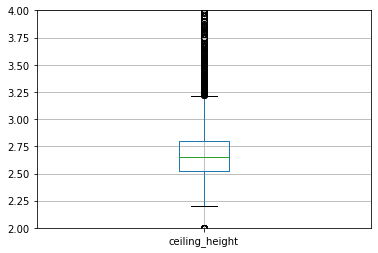

In [6]:
import matplotlib.pyplot as plt
plt.ylim(2, 4)
data.boxplot('ceiling_height')
plt.show()

Для того чтобы выбросы не повлияли на вычисления медиан, установим допустимые пороги в соответсвии с концами "усов" диаграммы размаха. Сгруппируем по этажности домов и заполним пропуски.

In [7]:
# создаем переменную, в которой будут храниться отфильтрованные группы и их медианы 
med_ch = data.query('2.1 < ceiling_height < 3.3').groupby('floors_total')['ceiling_height'].median()

#функция принимает строку и если значение высоты потолка пропущенно, то, в зависимости от количества этажей, возвращает 
#медианное значение среди всех домов с таким же количеством этажей
def filna_ch(row):
    if pd.isna(row['ceiling_height']):
        if row['floors_total'] in med_ch.index:
            return med_ch[row['floors_total']]
    else:
        return row['ceiling_height']

data['ceiling_height'] = data.apply(filna_ch, axis=1)
# проверим остались ли пропуски
data['ceiling_height'].isna().sum()

78

Осталось небольшое количество пропусков. Наврное в некоторых группах отсутствовали вообще все значения высот потолков. Их уже можно заменить на медиану по всему столбцу. Сделаем это и окончательно убедимся в их отсутствии. 

In [8]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
data['ceiling_height'].isna().sum()

0

**living_area**

Теперь займемся столбцом living_area. Здесь пропуски также скорее всего вызваны человеческим фактором, так как мало кто разделяет общую площадь с жилой. В столбце тоже довольно много пропущенных значений.

Посмотрим общие данные по столбцу 

In [9]:
data['living_area'].describe()

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

Разброс значений довольно большой. К тому же 2м^2 жилой площади не очень походят на правду.

Для того чтобы увеличить точность дальнейшего анализа, будем заполнять пропущенные значения оприаясь на общую площадь квартиры.
Так как значения общей площади имеют количественный тип данных, для успешного нахождения медианы разобьем общую площадь на категории по 10м^2, посчитаем для каждой группы медиану и заполним пропуски в столбце living_area в соответствии с группами.

In [10]:
# создаем дополнительный столбец для категорий
data['total_area_category'] = data['total_area'] // 10

# в переменной med_la хранятся медианные значения жилой площади для каждой категории общей площади
med_la = data.groupby('total_area_category')['living_area'].median()

# функция прнимает строку и в зависимости от значения параметра total_area_category заполняет пропущенные значения
def filna_la(row):
    if pd.isna(row['living_area']):
        if row['total_area_category'] in med_la.index:
            return med_la[row['total_area_category']]
    else:
        return row['living_area']
    
data['living_area'] = data.apply(filna_la, axis=1)
# посмотрим остались ли пропуски
data['living_area'].isna().sum()

2

Осталось два пропуска, которые смело можно заменить медианой по всему столбцу.

In [11]:
data['living_area'] = data['living_area'].fillna(data['living_area'].median())
# убедимся что пропусков не осталось
data['living_area'].isna().sum()

0

После заполнения стоит проверить, что жилая площадь где-нибудь не стала больше общей.

In [12]:
len(data.query('total_area < living_area'))

0

**kitchen_area**

Вероятнее всего пропуски здесь вызваны человеческим фактором, так как мало кто дополнительно указывает площадь кухни. Посмотрим на max, min и медиану столбца.

In [13]:
data['kitchen_area'].describe()

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

Точно так же как и со столбцом living_area при заполнении пропусков здесь будем опираться на столбец с общей площадью. Столбец с группами уже есть, осталось лишь заполнить медианами в соответствии с группой.

In [14]:
# в переменной med_ka хранятся медианные значения куханной площади для каждой категории общей площади
med_ka = data.groupby('total_area_category')['kitchen_area'].median()

# функция прнимает строку и в зависимости от значения параметра total_area_category заполняет пропущенные значения
def filna_ka(row):
    if pd.isna(row['kitchen_area']):
        if row['total_area_category'] in med_ka.index:
            return med_ka[row['total_area_category']]
    else:
        return row['kitchen_area']
    
data['kitchen_area'] = data.apply(filna_ka, axis=1)

# больше нам не нужен столбец total_area_category поэтому можем его удалить
data.drop('total_area_category', axis=1, inplace=True)

# посмотрим остались ли пропуски
data['kitchen_area'].isna().sum()

1

При заполнении пропусков в столбце living_area у нас не сразу получилось заполнить все, как и сейчас. Стоит взглянуть на эту строку, ведь она может состоять из одних пропусков.

In [15]:
data[pd.isnull(data['kitchen_area'])]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22131,14,27000000.0,422.2,2018-10-18T00:00:00,5,2.7,13.0,30.0,11,NaN,False,False,NaN,0.0,Санкт-Петербург,46625.0,16554.0,0.0,NaN,0.0,NaN,NaN


Предположение оказалось неверным, строка достаточно заполнена другими данными. Поэтому тут смело можно заменить пропуск общей медианой.

In [16]:
data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].median())
# убедимся что пропусков не осталось
data['living_area'].isna().sum()

0

**is_apartment**

Этот столбец состоит из булевых данных. Посмотрим на их соотношение.

In [17]:
data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

In [18]:
2725 / (2725 + 50)

0.9819819819819819

Значения False составялют более 98%. 

Скорее всего пропуски в этом столбце предполагают собой логическое "нет". Поэтому с 98%-ой вероятностью заполним отсутствующие значения на False.

In [19]:
data['is_apartment'] = data['is_apartment'].fillna(False)
# убедимся что пропусков не осталось
data['is_apartment'].isna().sum()

0

### Вывод:

Во всех столбцах, в которых возможна замена пропущенных значений, пропуски заменены на наиболее подходящие значения. Таким образом мы сохранили значительную часть данных, нужных для последующего анализа, а так же исключили возможные ошибки.

<a id="types"></a>
### Изменение типов данных

В столбцах last_price, total_area, ceiling_height, floors_total, living_area, kitchen_area, balcony, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest и ponds_around3000 данные соответствуют вещественному типу. 

Для исключения арифметических ошибок и для упрощения восприятия данных сделаем их целочисленными. Дробная часть играет роль только в столбце ceiling_height. Поэтому здесь переведем значения из метров в сантиметры.



In [20]:
data['last_price'] = data['last_price'].astype('int')
data['total_area'] = data['total_area'].astype('int')

data['ceiling_height'] = data['ceiling_height'] * 100
data['ceiling_height'] = data['ceiling_height'].astype('int')

data['living_area'] = data['living_area'].astype('int')
data['kitchen_area'] = data['kitchen_area'].astype('int')
data['balcony'] = data['balcony'].astype('int')

data['floors_total'] = data['floors_total'].astype('Int64', errors ='ignore')
data['airports_nearest'] = data['airports_nearest'].astype('Int64', errors ='ignore')
data['cityCenters_nearest'] = data['cityCenters_nearest'].astype('Int64', errors ='ignore')
data['parks_nearest'] = data['parks_nearest'].astype('Int64', errors ='ignore')
data['ponds_around3000'] = data.ponds_around3000.round().astype('Int64')
data['parks_around3000'] = data.parks_around3000.round().astype('Int64')
data['ponds_nearest'] = data['ponds_nearest'].astype('Int64', errors ='ignore')
data['days_exposition'] = data.days_exposition.round().astype('Int64')


**first_day_exposition**

Значения с датой представленны в строковом виде. Преобразуем их в соответсвующий тип, чтобы нам было легко определять все временные значения и получать дополнительную информацию о дате. Затем убедимся в корректности замены.


In [21]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['first_day_exposition'].head()

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

<a id="names"></a>
### Обработка названий населенных пунктов

Теперь приведем к общему виду названия населенных пунктов.

Посмотрим на уникальные значения этого столбца

In [22]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Так как типы населнных пунктов не играют никакой роли, то избавимся от них. Это поможет объеденить одинаковые по смыслу значения, которые записаны по-разному.

In [23]:
# в функцию передается значение. если оно строковое, то возвращает только то слово, которое
# начинается с большой буквы(название)
def choose_locality_name(s):
    if type(s) == str:
        lst_s = s.split()
        lst_new= []
        for word in lst_s:
            for letter in word:
                if letter.isupper():
                    lst_new.append(word)
                break
        return ' '.join(lst_new)
    else:
        return s
    
#перепишем названия в старый столбец
data['locality_name'] = data['locality_name'].apply(choose_locality_name)
# проверим изменения
data['locality_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Фёдоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодёжное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

### Вывод:

Все столбцы данных приведены к нужному типу. Повысилась читаемость и информативность таблицы, а также исключены возможные ошибки 
из-за конфликтов между типами данных.

<a id="step3"></a>
## Шаг 3. Добавление дополнительных параметров.

<a id="m2"></a>
### Добавление цены квадратного метра

Создадим новый столбец square_meter_price. Он будет отображать цену за квадратный метр.

In [24]:
data['square_meter_price'] = (data['last_price'] / data['total_area']).astype('int')

<a id="wmy"></a>
### Добавление расширенной информации по дате

Теперь добавим столбцы, в которые будут отображать день недели, месяц и год публикации объявления. Назовем их соответственно weekday, month и year.

In [25]:
data['weekday'] = data['first_day_exposition'].dt.weekday
# для удобства восприятия начнем нумерацию дней недели не с нуля, а с единицы
data['weekday'] = data['weekday'] + 1

data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year



<a id="floor"></a>
### Добавление категорий этажей

При покупке жилья в многоэтажном доме люди часто негативно воспринимают первый и последний этажи. Это связано с некоторыми дополнительными проблемами: первый этаж граничит с подвалом, из-за чего могут быть проблемы с полом, у посленего по аналогии с крышей. Поэтому будет разумно создать столбец floor_category, в котором категоризируем указанные в объявлении этажи по этому принципу. Всего будет три категории - первый, последний, другой.

Отдельно стоит выделить одноэтажные дома. Их логичнее всего поместить в группу "другой", потому что данный столбец служит для отражения более проблемных квартир(группы "первый" и "последний"). Частные одноэтажные дома, хоть и обладают некоторыми недостатками этих групп, но имеют свои плюсы перекрывающие их. 

In [26]:
def choose_floor_category(row):
    if pd.notna(row['floors_total']):
        if row['floors_total'] == 1:
            return 'другой'
        elif row['floors_total'] == row['floor']:
            return 'последний'
        elif row['floors_total'] != 1 and row['floor'] == 1:
            return 'первый'
        else:
            return 'другой'
    else:
        return row['floors_total']

data['floor_category'] = data.apply(choose_floor_category, axis=1)

<a id="ratio"></a>
### Добавление отношений жилой площади и кухни к общей площади

Добавим еще два столбца, которые бы показывали соотношение жилой и общей площади, а также отношение площади кухни к общей. Назовем их living_ratio и kitchen_ratio. Значения в них будут указываться в процентном отношении.

In [27]:
data['living_ratio'] = (data['living_area'] / data['total_area'] * 100).astype('int')
data['kitchen_ratio'] = (data['kitchen_area'] / data['total_area'] * 100).astype('int')

Посмотрим на результаты добавления.

In [28]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,weekday,month,year,floor_category,living_ratio,kitchen_ratio
0,20,13000000,108,2019-03-07,3,270,16,51,8,False,False,False,25,0,Санкт-Петербург,18863,16028,1,482,2,755,NaN,120370,4,3,2019,другой,47,23
1,7,3350000,40,2018-12-04,1,275,11,18,1,False,False,False,11,2,Шушары,12817,18603,0,NaN,0,NaN,81,83750,2,12,2018,первый,45,27
2,10,5196000,56,2015-08-20,2,254,5,34,4,False,False,False,8,0,Санкт-Петербург,21741,13933,1,90,2,574,558,92785,4,8,2015,другой,60,14
3,0,64900000,159,2015-07-24,3,260,14,94,9,False,False,False,18,0,Санкт-Петербург,28098,6800,2,84,3,234,424,408176,5,7,2015,другой,59,11
4,2,10000000,100,2018-06-19,2,303,14,32,13,False,False,False,41,0,Санкт-Петербург,31856,8098,2,112,1,48,121,100000,2,6,2018,другой,32,41


### Вывод:

Были добавлены столбцы, которые помогут при дальнейшем анализе.

<a id="step4"></a>
## Шаг 4. Проведение исследовательского анализ данных и выполнение инструкций

<a id="osnov"></a>
### Изучение основных параметров 

Изучим такие основные пареметры как площадь, цена, число комнат и высота потолков. На основе полученной информации сделаем выводы и отбросим значения мешающие анализу.

**Жилая площадь**

Рассмотрим столбец с общей площадью. Посмотрим на числовое описание данных и построим гистаграмму.

In [29]:
data['total_area'].describe()

count    23699.000000
mean        60.120511
std         35.665822
min         12.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        900.000000
Name: total_area, dtype: float64

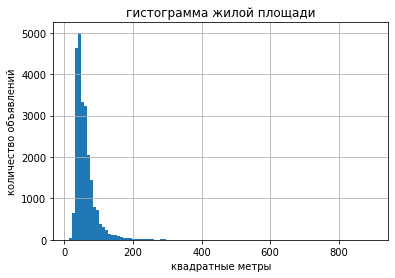

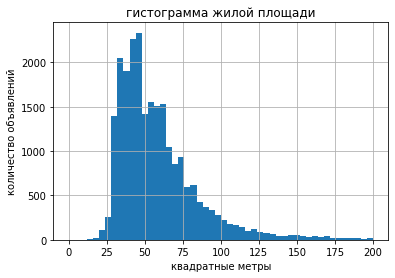

In [30]:
data['total_area'].hist(bins=100)
plt.title('гистограмма жилой площади')
plt.xlabel('квадратные метры')
plt.ylabel('количество объявлений')
plt.show()

data['total_area'].hist(bins=50, range=(0, 200))
plt.title('гистограмма жилой площади')
plt.xlabel('квадратные метры')
plt.ylabel('количество объявлений')
plt.show()

Из графика и общих сведений получили информацию: общая площадь квартир имеет большой размах - от 12 до 900 м^2, но большая часть значений сосредоточена в диапазоне от 30 до 100, а после 200 количество объявлений на графике стремится к нулю.

Безусловно, квартиры с общей площадью больше 200 м^2 существуют, но они могу исказить результаты дальнейшего анализа. Поэтому стоит избавиться от подобных редких значений.

На всякий случай построим диаграмму размаха, чтобы убедиться в том, что мы не отрезаем больше чем можно.



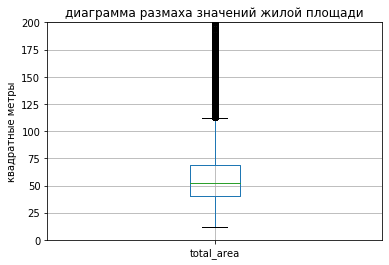

In [31]:
data.boxplot('total_area')
plt.ylim(0, 200)
plt.title('диаграмма размаха значений жилой площади')
plt.ylabel('квадратные метры')
plt.show()

Согласно диаграмме размаха, выбросами являются значения превышающие ~120м^2. Это дает нам уверенность, что важная часть даных не будет задета при отбросе значений, которые больше 200.

Запишем в переменную data_clear_ta выбранную часть данных.

In [32]:
data_clear_ta = data.query('total_area < 200')

**Цена**

Рассмотрим столбец с ценами. Посмотрим на числовое описание данных, построим гистаграмму и диаграмму размаха.

In [33]:
data['last_price'].describe().astype('int')

count        23699
mean       6541548
std       10887013
min          12190
25%        3400000
50%        4650000
75%        6800000
max      763000000
Name: last_price, dtype: int64

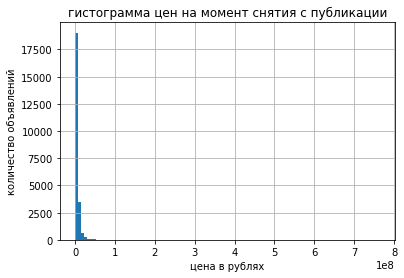

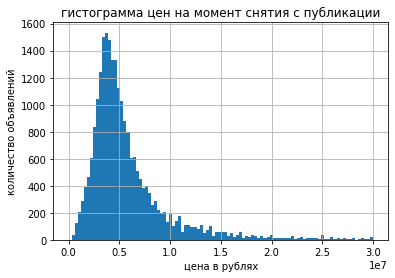

In [34]:
data['last_price'].hist(bins=100)
plt.title('гистограмма цен на момент снятия с публикации')
plt.xlabel('цена в рублях')
plt.ylabel('количество объявлений')
plt.show()

data['last_price'].hist(bins=100, range=(0, 30000000))
plt.title('гистограмма цен на момент снятия с публикации')
plt.xlabel('цена в рублях')
plt.ylabel('количество объявлений')
plt.show()

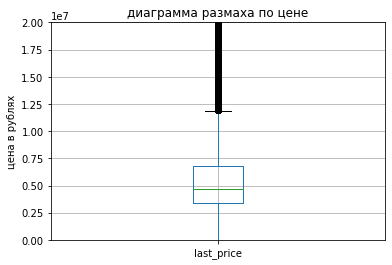

In [35]:
data.boxplot('last_price')
plt.title('диаграмма размаха по цене')
plt.ylabel('цена в рублях')
plt.ylim(0, 20000000)
plt.show()

По результатам видно, что размах цен очень большой. Большая часть значений сосредоточена в диапазоне от 2 до 10 миллионов рублей. 

По графикам видно, что квартир выше 20млн.руб. черезвычайно мало. Подобные значенения могут негативно повлиять на анализ. Поэтому заручившись поддержкой показаний диаграммы размаха, по которой видно, что выбросы начинаются от значений в 12млн.руб., мы откажемся от этой части данных.

Также минмальное значение вызывает недоверие. Посмотрим много ли их. Выведем все цены меньше полумиллиона рублей.

In [36]:
data.query('last_price < 500000')['last_price']

5698     450000
6859     490000
8793      12190
9581     450000
10782    490000
14911    430000
16032    480000
16219    450000
16274    440000
17456    430000
17676    450000
18867    470000
21912    470000
23484    470000
Name: last_price, dtype: int64

Подобное значение всего одно. Также откажемся от него. Создадим новую переменную data_clear_lp, в которой сохраним выбранную часть данных.

In [37]:
data_clear_lp = data.query(' 13000 < last_price < 20000000 ')

**Число комнат**

Построим гистогрмму и взглянем на значения.

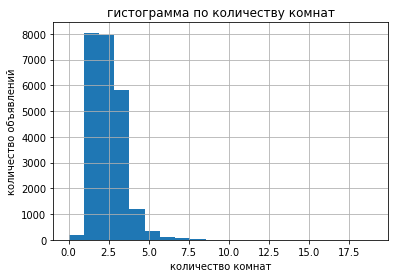

In [38]:
data.hist('rooms', bins=20)
plt.title('гистограмма по количеству комнат')
plt.xlabel('количество комнат')
plt.ylabel('количество объявлений')
plt.show()

Первое что бросается в глаза это нулевое количество комнат. Стоит проверить связано ли это со студиями. Возмоэно из-за того, что в студиях всего одна комната, которая объединяет в себе и кухню и спальню, кто-то решил что комнат вовсе и нет.

Так как квартира-студия и квартира со свободной планировкой это подменяющие друг друга, идентичные понятия, будем искать такие объявления, которые имеют 0 комнат и одновременно не являются ни студиями, ни со свободной планировкой.

In [39]:
len(data.query('rooms == 0 and (studio == False and open_plan == False)'))

0

Таких квартир нет. Это дает нам право заполнить нули другим значением. Больше всего подходит единица, так как чисто логически хоть одна комната там есть.

In [40]:
data.loc[data['rooms'] == 0, 'rooms'] = 1

Теперь посторим диаграмму размаха и посмотрим на разброс значений.

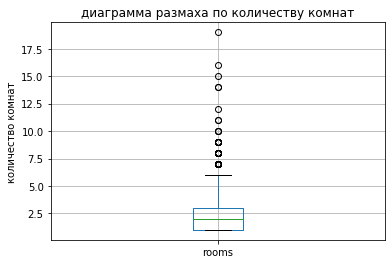

In [41]:
data.boxplot('rooms')
plt.title('диаграмма размаха по количеству комнат')
plt.ylabel('количество комнат')
plt.show()

Судя по гистограмме, количество комнат более 7 очень мало. Однако даже такие значения могут подпортить результаты анализа. Сверившись с диаграммой размаха смело отбрасываем квартиры с более чем семью комнатами. Оставшиеся данные запишем в переменную data_clear_r.

In [42]:
data_clear_r = data.query('rooms <= 7')

**Высота потолков**



In [43]:
data['ceiling_height'].describe()

count    23699.000000
mean       272.807207
std         99.065659
min        100.000000
25%        254.000000
50%        265.000000
75%        275.000000
max      10000.000000
Name: ceiling_height, dtype: float64

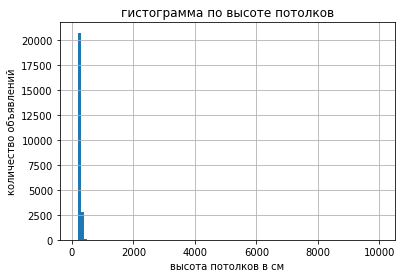

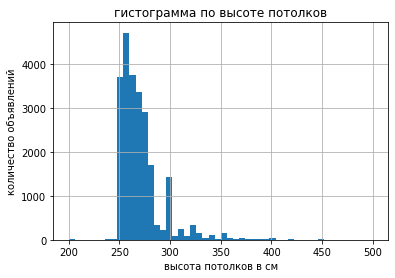

In [44]:
data.hist('ceiling_height', bins=100)
plt.title('гистограмма по высоте потолков')
plt.xlabel('высота потолков в см')
plt.ylabel('количество объявлений')
plt.show()

data.hist('ceiling_height', bins=50, range=(200, 500))
plt.title('гистограмма по высоте потолков')
plt.xlabel('высота потолков в см')
plt.ylabel('количество объявлений')
plt.show()

Размах в 99 метров. Это точно дает нам понять, что в данных есть выбросы. Из гистограммы видно, что большая часть значений укладывается в промежуток от 240 до 400 сантиметров. Стометровые потолки, как и метровые опредеденно являются выбросами и их нужно удалить. Посмотрим на диаграмму размаха и выберем порог для удаления выбросов.

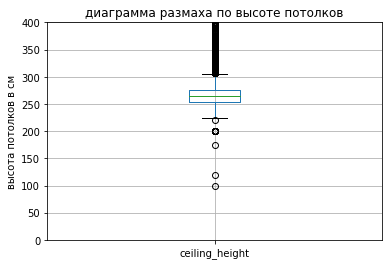

In [45]:
data.boxplot('ceiling_height')
plt.ylim(0, 400)
plt.title('диаграмма размаха по высоте потолков')
plt.ylabel('высота потолков в см')
plt.show()

По графику видно, что значения выше 3 и ниже 2.25 метров похожи на выбросы. Так как на гистограмме еще отчетливо видны значения в 350см, то возьмем это значение как верхнюю границу. Нижнюю же обозначим в соответствии с минимальной нормой в России - 2,4 метра. Сохраним выборку в переменную data_clear_ch.

In [46]:
data_clear_ch = data.query('240 < ceiling_height < 350')

Объеденим очищенные данные и запишем их в переменную good_data. Затем проверим какой объем данных был удален.

In [47]:
# в цикле находим те индексы, которые не встречаются хотя бы в одном из датафреймов
# затем добавляем их в переменную wrong_indexes
wrong_indexes = []
for i in range(len(data)):
    if not (i in data_clear_ta.index and i in data_clear_lp.index and i in data_clear_r.index and i in data_clear_ch.index):
        wrong_indexes.append(i)

# удаляем строки по индексу и восстанавливаем порядок индексов
good_data = data.drop(wrong_indexes, axis='index')
good_data = good_data.reset_index(drop=True)

del_sum = len(data) - len(good_data)
del_percent = round(del_sum / len(data) * 100)
print(f'В результате удаления выбросов мы потеряли {del_sum} строк, что составляет {del_percent}% от всех данных.')

В результате удаления выбросов мы потеряли 1142 строк, что составляет 5% от всех данных.


Довольно небольшая цена за полученное качество данных.

### Вывод:

Изучены основные парметры. На их основе сформирована таблица, очищенная от выбросов. 

<a id="time"></a>
### Изучение времени продажи квартиры

Опишем, сколько обычно занимает продажа и когда можно считать, что продажи прошли очень быстро, а когда необычно долго.

Потом построим гистограмму по столбцу days_exposition, посмотрим на среднее значение и медиану.

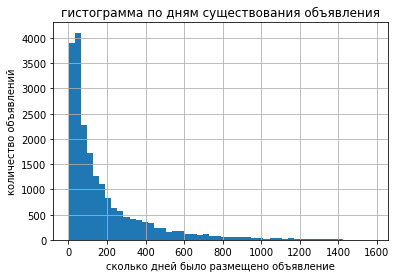

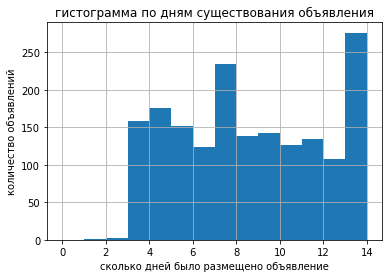

In [48]:
data.hist('days_exposition', bins=50)
plt.title('гистограмма по дням существования объявления')
plt.xlabel('сколько дней было размещено объявление')
plt.ylabel('количество объявлений')
plt.show()

data.hist('days_exposition', bins=14, range=(0, 14))
plt.title('гистограмма по дням существования объявления')
plt.xlabel('сколько дней было размещено объявление')
plt.ylabel('количество объявлений')
plt.show()

In [49]:
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

### Вывод:

Если воспринимать снятие объявления как продажу, то размах данных действтильно большой. Кто-то продал квартиру за день, другие же не могут этого сделать 4 года. Собственно из-за этого среднее значение так сильно разнится с медианой.Поэтому будем считать что *среднее время продажи квартиры* - 3 месяца.

После 800 дней график сливается с нулем, то есть подобных наблюдений очень мало, а время возрастает аж в 2 раза. Поэтому можно обозначить время от 800 дней - как *очень долгая продажа*. 

В приближенном масштабе видно, что от двух дней начинается резкое и стабильное увеличение количества продаж. Поэтому *чрезвычайно быстрой продажей* кваритры будем считать время - 2 дня

<a id="fact"></a>
### Выявление факторов от которых зависит стоимость квартиры

Даже не проводя никаких аналитических исследований ясно, что чем квартира больше, тем она дороже. Поэтому, анализируя стоимость квартиры, будем сравнивать показатели не со стоимостью всей кваритиры, а с ценой за квадратный метр.

Сначала проверим зависимость цены **от площади**. Построим диаграмму рассеяния.

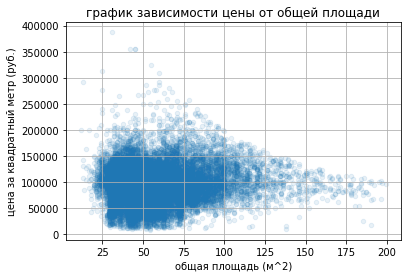

In [50]:
good_data.plot(grid=True, kind='scatter', y='square_meter_price', x='total_area', alpha=0.1)
plt.title('график зависимости цены от общей площади')
plt.xlabel('общая площадь (м^2)')
plt.ylabel('цена за квадратный метр (руб.)')
plt.show()

На графике видим одно темное пятно. Оно дает нам понять, что явной зависимости нет.

Однако из диаграммы можем сделать вывод: у квартир с площадью более чем 75м^2 наблюдается рост нижнего порога цены за квадратный метр. Так квартиры с площадью более 100м^2 практически не могут стоить ниже 50000 руб. за м^2.

Теперь взглянем на зависимость цены от **количества комнат**.

Посторим диаграмму рассеяния для этих параметров.

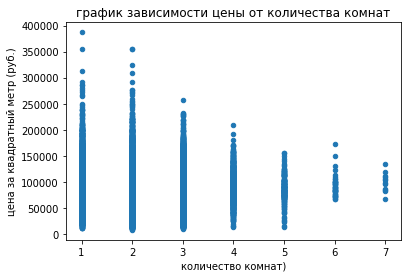

In [51]:
good_data.plot(kind='scatter', y='square_meter_price', x='rooms')
plt.title('график зависимости цены от количества комнат')
plt.xlabel('количество комнат)')
plt.ylabel('цена за квадратный метр (руб.)')
plt.show()

Видна некоторая зависимость, но судить о ней сложно, так как количество комнат состоит скорее из категоральных значений и значения сбиваются в одну кучу.
Для того, чтобы лучше рассмотреть зависимость, построим график по числу комнат от медианной цены за квадратный метр.

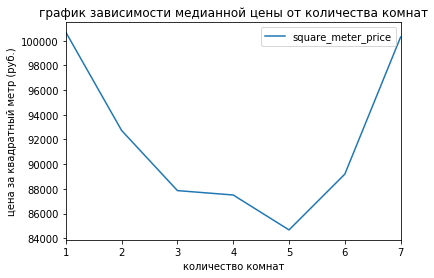

In [52]:
good_data.pivot_table(index='rooms', values='square_meter_price', aggfunc='median').plot()
plt.title('график зависимости медианной цены от количества комнат')
plt.xlabel('количество комнат')
plt.ylabel('цена за квадратный метр (руб.)')
plt.show()


Дороже всего оказались однокомнатные квартиры. Дальше идет резкий спад до пяти комнат. Скорее всего это связано с тем, что при увеличении жилой площади, которую и добавялют комнаты, увеличений общей происходит нелинейно - прихожая, ванная, кухня все так же одни в квартире.

После пяти комнат идет резкий рост вплоть до семи. Напомним, что подобных наблюдений довольно мало, чтобы точно утверждать об увеличении стоимости цены в промежутке от 5 до 7 комнат, но можно сделать предположение, что кваритры с более чем пятью комнатами это действительно недешевые квартиры, которые существуют в основном только в элитной недвижимости, которая разумеется и стоит дороже.

Изучим зависимость цены от **удаленности от центра**. Посторим диаграмму рассеяния для этих параметров.

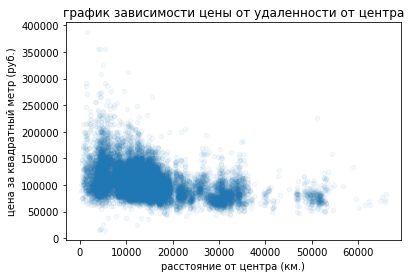

In [53]:
good_data.plot(kind='scatter', y='square_meter_price', x='cityCenters_nearest', alpha=0.05)
plt.title('график зависимости цены от удаленности от центра')
plt.xlabel('расстояние от центра (км.)')
plt.ylabel('цена за квадратный метр (руб.)')
plt.show()

По диаграмме можно сделать вывод: верхний порог цены тем меньше, чем дальше квартира от центра. Точно определить зависимость мешают другие факторы, но, судя по верхней цене, она скорее всего есть.

Следующей изучим зависимость цены **от этажа**.

Сравнивать будем с категориями. Мы уже убедились, что диаграмма рассеяния на категоральных значениях работает плохо, поэтому оценим по графику зависимости медианной цены за квадратный метр по каждой категории. 

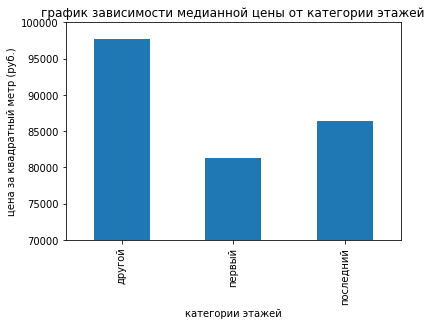

In [54]:
good_data.pivot_table(index='floor_category', values='square_meter_price', aggfunc='median').plot(kind='bar', ylim=(70000, 100000), legend=False)


plt.title('график зависимости медианной цены от категории этажей')
plt.xlabel('категории этажей')
plt.ylabel('цена за квадратный метр (руб.)')
plt.show()

Зависимость на лицо. Самый неудачный - первый этаж, на последнем все же цена выше. Видимо к проблеме с полом, добавляется опасность доступности прохожих, из-за чего многие и ставят решетки на окна. А проблемы последнего этажа, хоть и немного, но окупаются хорошим видом из окна.

Последними изучим зависимости цены **от даты размещения: дня недели, месяца и года**.

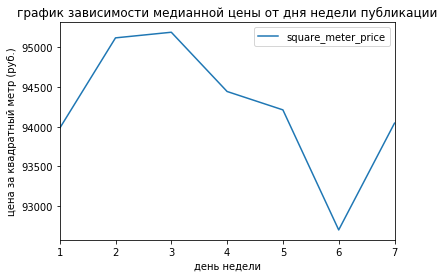

In [55]:
good_data.pivot_table(index='weekday', values='square_meter_price', aggfunc='median').plot()
plt.title('график зависимости медианной цены от дня недели публикации')
plt.xlabel('день недели')
plt.ylabel('цена за квадратный метр (руб.)')
plt.show()

Интересные результаты. В ближе к середине недели выкладывают более дорогие объявления, а к субботе наоборот цена понижается. Наврное это связанно с наиболее распространенным графиком работы 5/2 - риэлторы как и все работают по будням и соответственно выкладывают свои объявления в буднии дни. А собственники скорее будут этим заниматься на выходных, что и выидно из графика.

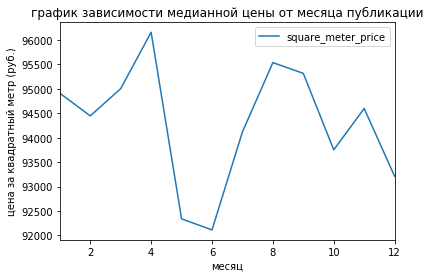

In [56]:
good_data.pivot_table(index='month', values='square_meter_price', aggfunc='median').plot()
plt.title('график зависимости медианной цены от месяца публикации')
plt.xlabel('месяц')
plt.ylabel('цена за квадратный метр (руб.)')
plt.show()

Тут определенно можно скзать о наличии зависимости. На протяжении года цена скачет и дороже всего в апреле и августе. А тем, кто хочет покупать одни совет: начинайте поиск в мае, предложения будут гораздо выгоднее.

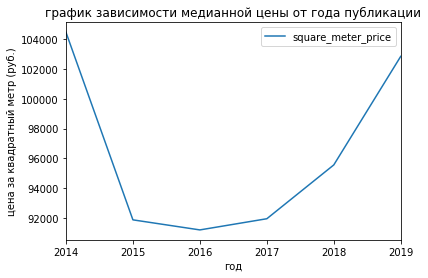

In [57]:
good_data.pivot_table(index='year', values='square_meter_price', aggfunc='median').plot()
plt.title('график зависимости медианной цены от года публикации')
plt.xlabel('год')
plt.ylabel('цена за квадратный метр (руб.)')
plt.show()

По графику видно, что с 2015 до 2017 года на рынке недвижимости был большой кризис, средняя цена упала аж на 12 тысяч рублей. Активный рост начался с 2017 и к 2019 уже почти нагнал уровень 2014 года. 

### Вывод:

Судя по результатом каждый праметр хоть немного, но влияет на стоимость квартиры. К самым влятельным можно отнести:

- **год** - рынок недвижимости динамичен
- **этаж** - первый и последний этажи сильно проседают в цене по сравнению с другими
- **количество комнат** - неочевидный факт: чем больше комнат, тем дешевле цена за квадратный метр

Отдельно хочется обозначить два фактора, в которых сложно выявить четкую зависимость, но выявлены интересные факты:
- **зависимость цены от площади** - тут нет четкой зависимости, однако у квартир с площадью более чем 75м^2 наблюдается рост нижнего порога цены за квадратный метр
- **зависимость цены от удаленности от центра** - верхний порог цены тем меньше, чем дальше квартира от центра

<a id="10names"></a>
### Выявление населенных пунктов с наибольшей и наименьшей ценой недвижимости

Выделим 10 населенных пунктов с наибольшим числом объявлений и рассчитаем для каждого среднюю цену за квадратный метр. Построим график, по получившимся значениям, чтобы легче было оценить результаты.

In [58]:
good_data['locality_name'].value_counts().head(10)

Санкт-Петербург    14686
Мурино               588
Кудрово              471
Шушары               439
Всеволожск           393
Пушкин               349
Колпино              336
Парголово            326
Гатчина              305
Выборг               227
Name: locality_name, dtype: int64

In [59]:
top_ten = (good_data.query(' locality_name in ("Санкт-Петербург", "Мурино", "Кудрово", "Шушары", "Всеволожск", "Пушкин", "Колпино", "Парголово", "Гатчина", "Выборг")')
     .pivot_table(index='locality_name', values='square_meter_price', aggfunc='median')
     .sort_values(by='square_meter_price',  ascending=False)
     .astype('int')
)

top_ten

,square_meter_price
locality_name,
Санкт-Петербург,104000
Пушкин,100000
Кудрово,96226
Парголово,92252
Мурино,86729
Шушары,77173
Колпино,74861
Гатчина,67924
Всеволожск,65789


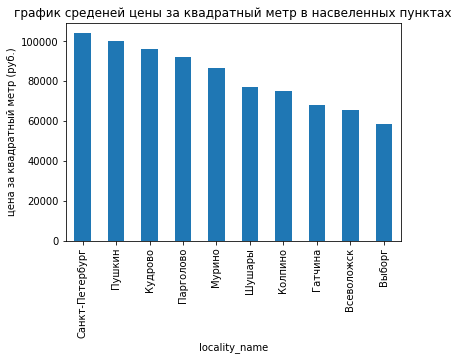

In [60]:
top_ten.plot(kind='bar', legend=False)
plt.title('график среденей цены за квадратный метр в насвеленных пунктах')
plt.ylabel('цена за квадратный метр (руб.)')
plt.show()

### Вывод: 

Самая высокая стоимость жилья в Санкт-Петербурге. Это логично, ведь Питер - вторая столица России. Рядом расположился город Пушкин. Этих двух фаворитов можно выделить как населеные пункты с наиболее дорогой стоимостью жилья. В конце же списка Выборг, Всеволжск и Гатчина. В этих городах жилье более доступно.

<a id="radius"></a>
### Определение радиуса центральной области Санкт-Петербурга

Выясним какая область входит в понятие "центр города". Для этого построим график отображающий зависимость цены за квадратный метр от расстояния от центра города.

Для удобства построения выделим каждый километр как отдельную категорию и так сгруппируем, сопоставив каждой категории медианную цену.

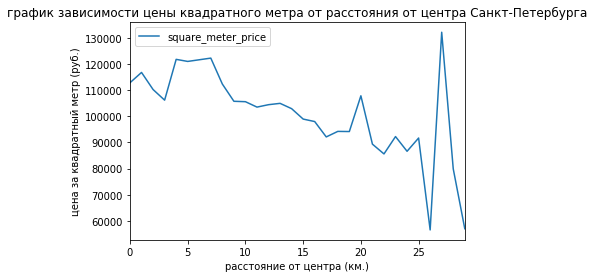

In [61]:
# в переменную добавим только объявления по Питеру
peter_data = good_data.query('locality_name == "Санкт-Петербург"').copy()
# создадим новый столбец, в которм будут отображаться катергории 
peter_data['distance_from_center_km'] = (peter_data['cityCenters_nearest'] // 1000)

# сгруппируем и построим график
peter_data.pivot_table(index='distance_from_center_km', values='square_meter_price', aggfunc='median').plot()
plt.title('график зависимости цены квадратного метра от расстояния от центра Санкт-Петербурга')
plt.xlabel('расстояние от центра (км.)')
plt.ylabel('цена за квадратный метр (руб.)')
plt.show()

Цена начинает устойчивое падение в диапазоне 5-10 км. от центра. Хоть и на графике есть некоторое колебание значений вначале, но оно врядли повлияет на определение радиуса центра. Это больше похоже на ценовой разброс в районах самого центра или особенности конкретных объявлений.

На графике также виден странный пик в райное 27 км. Судя по километражу, это центр другого города Пушкин, а там, как мы выяснили раньше, средняя цена за квадратный метр лишь немного меньше чем в северной столице.

Уменьшим диапазон значений графика, чтобы точно определить границу центра.

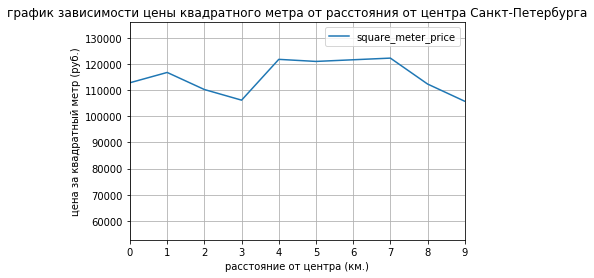

In [62]:
peter_data.pivot_table(index='distance_from_center_km', values='square_meter_price', aggfunc='median').plot(grid=True)
plt.xlim(0, 9)
plt.title('график зависимости цены квадратного метра от расстояния от центра Санкт-Петербурга')
plt.xlabel('расстояние от центра (км.)')
plt.ylabel('цена за квадратный метр (руб.)')
plt.show()

Теперь явно видно значение перепада.

### Вывод:

Определяем *радиус центра - 7 км*.

<a id="centr"></a>
### Отдельная оценка сегмента квартир в центре

Проанализируем выборку центра Санкт-Петербурга по тем же параметрам, что и анализировали все объявления. Сравним полученные результаты с общими результатами.

Сначала посмотрим **общую площадь**. Построим гистограммы по столбцу total_area.

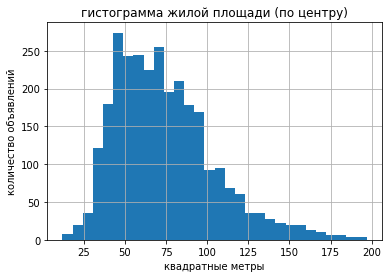

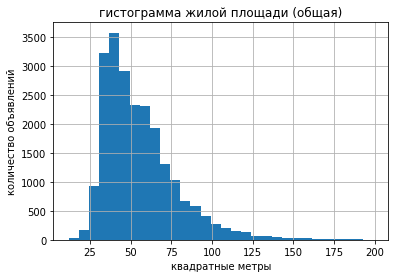

In [63]:
peter_center_data = peter_data.query('distance_from_center_km <= 7')

peter_center_data.hist('total_area', bins=30)
plt.title('гистограмма жилой площади (по центру)')
plt.xlabel('квадратные метры')
plt.ylabel('количество объявлений')
plt.show()

good_data['total_area'].hist(bins=30)
plt.title('гистограмма жилой площади (общая)')
plt.xlabel('квадратные метры')
plt.ylabel('количество объявлений')
plt.show()

Из графика видим, что в основном значения в центре сосредоточены в диапазоне от 35 до 125 м^2. Да, диапазоны основных значений похожи, однако в общей гистограмме после пика наблюдается более резкий спад. Это говорит о том, что квартиры в центре в среднем больше по площади.


Следующей рассмотрим **стоимость квартир**.

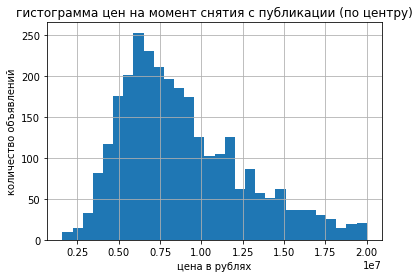

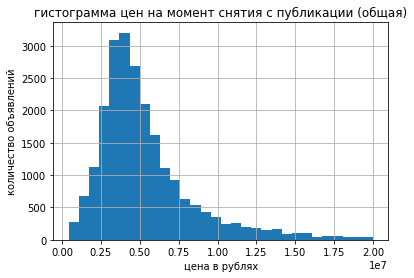

In [64]:
peter_center_data.hist('last_price', bins=30)
plt.title('гистограмма цен на момент снятия с публикации (по центру)')
plt.xlabel('цена в рублях')
plt.ylabel('количество объявлений')
plt.show()

good_data.hist('last_price', bins=30)
plt.title('гистограмма цен на момент снятия с публикации (общая)')
plt.xlabel('цена в рублях')
plt.ylabel('количество объявлений')
plt.show()

Пик в районе 6 миллионов рублей. А основные значения начинаются от 4 млн и медленно падают влоть до 20 млн. Это уже сильно разнится с общими результатами. Где пик был на 4, а диапазон большинства значений был от 2 до 8 млн. В центре 8млн это одни из самых продаваемых квартир.

Дальше рассмотрим **количество комнат**.

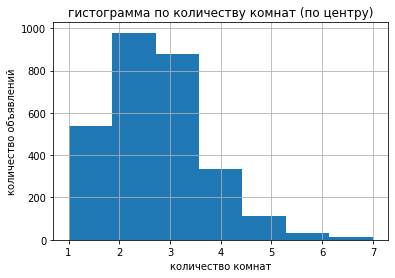

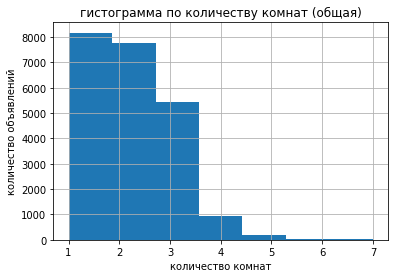

In [65]:
peter_center_data.hist('rooms', bins=7)
plt.title('гистограмма по количеству комнат (по центру)')
plt.xlabel('количество комнат')
plt.ylabel('количество объявлений')
plt.show()

good_data.hist('rooms', bins=7)
plt.title('гистограмма по количеству комнат (общая)')
plt.xlabel('количество комнат')
plt.ylabel('количество объявлений')
plt.show()

В центре гораздо меньше однушек и значительно больше трешек, но болше всего двушек. 

Теперь построим гистограммы по **высотам потолка**.

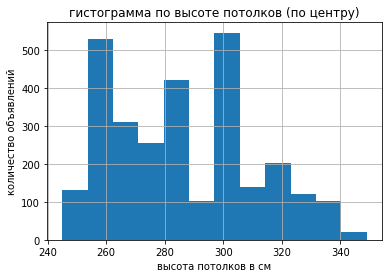

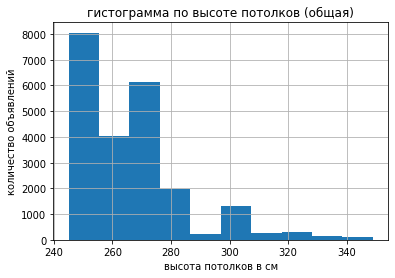

In [66]:
peter_center_data.hist('ceiling_height', bins=12)
plt.title('гистограмма по высоте потолков (по центру)')
plt.xlabel('высота потолков в см')
plt.ylabel('количество объявлений')
plt.show()

good_data.hist('ceiling_height', bins=10)
plt.title('гистограмма по высоте потолков (общая)')
plt.xlabel('высота потолков в см')
plt.ylabel('количество объявлений')
plt.show()

Здесь наблюдаем сильную разницу показаний. Если вцелом преобладают квартиры с низкими потолками, то в центре гораздо больше квартир с высокими, о чем свидетельствует наибольший пик на 3 метрах.

Возможно это связано с тем, что в центре стоят старые дома, а они как правило с высокими потолками. К тому же свою роль сыграли спальные районы на окраинах. В этих домах никогда не станут делать высокие потолки из соображений выгоды для застройщика.

Посмотрим на **факторы влияющие на стоимость квартир в центре**. Опять же будем сравнивать не со стоимостью квартир, а с ценой за квадратный метр. Параллельно будем сравнивать с общей картиной.

Сначала посмотрим на графики **по количеству комнат**.

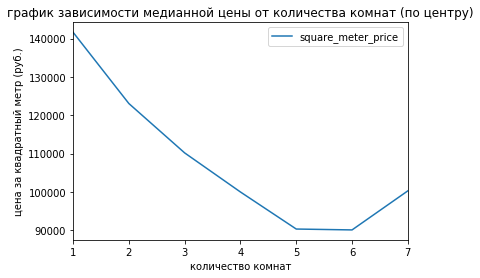

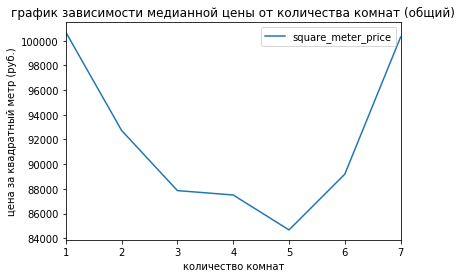

In [67]:
peter_center_data.pivot_table(index='rooms', values='square_meter_price', aggfunc='median').plot()
plt.title('график зависимости медианной цены от количества комнат (по центру)')
plt.xlabel('количество комнат')
plt.ylabel('цена за квадратный метр (руб.)')
plt.show()

good_data.pivot_table(index='rooms', values='square_meter_price', aggfunc='median').plot()
plt.title('график зависимости медианной цены от количества комнат (общий)')
plt.xlabel('количество комнат')
plt.ylabel('цена за квадратный метр (руб.)')
plt.show()

В центре ситуация для квартир в которых пять и менее комнат ситуация практически одинаковая. Однако спад значений в центре более плавный, что свидетельствует о более высокой цене за двушки и трешки. Однако для квартир в 6 и 7 комнат резкого взлета, как это видно на общем графике, не произошло.

Теперь посмотрим изменилось ли что-нибудь в **категориях этажей**.

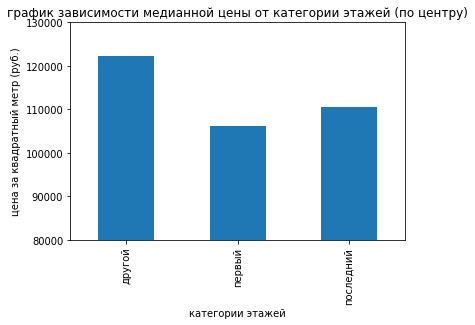

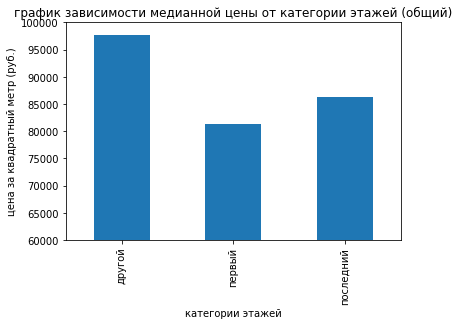

In [68]:
peter_center_data.pivot_table(index='floor_category', values='square_meter_price', aggfunc='median').plot(kind='bar', ylim=(80000, 130000), legend=False)
plt.title('график зависимости медианной цены от категории этажей (по центру)')
plt.xlabel('категории этажей')
plt.ylabel('цена за квадратный метр (руб.)')
plt.show()

good_data.pivot_table(index='floor_category', values='square_meter_price', aggfunc='median').plot(kind='bar', ylim=(60000, 100000), legend=False)
plt.title('график зависимости медианной цены от категории этажей (общий)')
plt.xlabel('категории этажей')
plt.ylabel('цена за квадратный метр (руб.)')
plt.show()

Картины идентичны, а значит и выводы для общей картины справедливы и в центре. Видимо проблемы первого и последнего этажа не зависят от местоположения квартиры.

Теперь оценим зависимость цены от **расстояния до центра**.

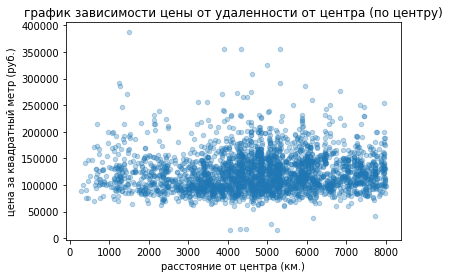

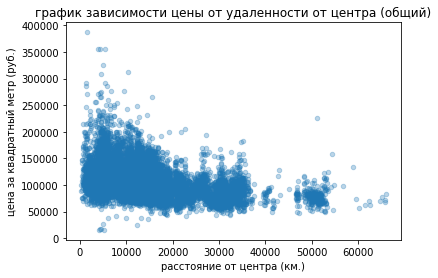

In [69]:
peter_center_data.plot(kind='scatter', y='square_meter_price', x='cityCenters_nearest', alpha=0.3)
plt.title('график зависимости цены от удаленности от центра (по центру)')
plt.xlabel('расстояние от центра (км.)')
plt.ylabel('цена за квадратный метр (руб.)')
plt.show()

good_data.plot(kind='scatter', y='square_meter_price', x='cityCenters_nearest', alpha=0.3)
plt.title('график зависимости цены от удаленности от центра (общий)')
plt.xlabel('расстояние от центра (км.)')
plt.ylabel('цена за квадратный метр (руб.)')
plt.show()

Как видим все довольно сильно поменялось. Квартиры внутри выделенного центрального района уже практически никак не различаются по цене.

И последними рассмотрим заввисимости от даты.

**По дню недели:**

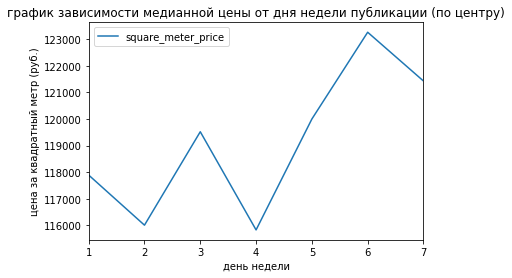

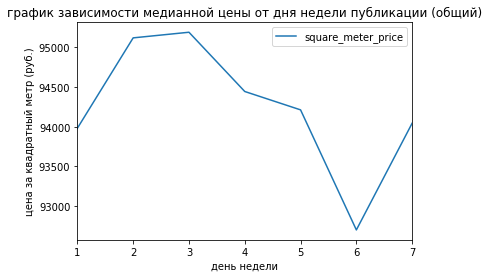

In [70]:
peter_center_data.pivot_table(index='weekday', values='square_meter_price', aggfunc='median').plot()
plt.title('график зависимости медианной цены от дня недели публикации (по центру)')
plt.xlabel('день недели')
plt.ylabel('цена за квадратный метр (руб.)')
plt.show()

good_data.pivot_table(index='weekday', values='square_meter_price', aggfunc='median').plot()
plt.title('график зависимости медианной цены от дня недели публикации (общий)')
plt.xlabel('день недели')
plt.ylabel('цена за квадратный метр (руб.)')
plt.show()

Графики кардинально отличаются. В центре самые дорогие объявления публикуются в выходные, в будние дни, за исключением среды, объявления дешевле. Если предположение о риэлторах и собственниках верно, то график по центру может открыть еще один факт - в центре в основном продают квартиры собственники. 

**По месяцу:**

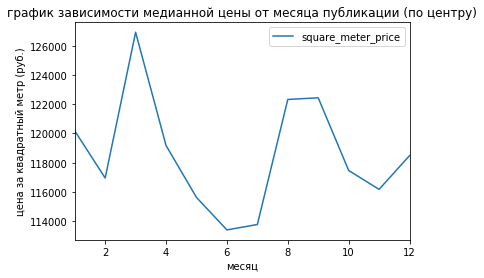

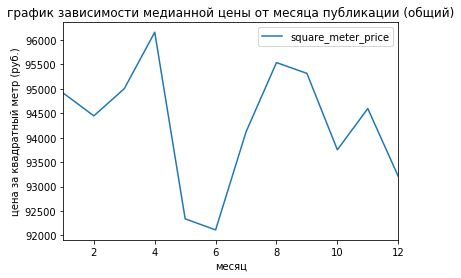

In [71]:
peter_center_data.pivot_table(index='month', values='square_meter_price', aggfunc='median').plot()
plt.title('график зависимости медианной цены от месяца публикации (по центру)')
plt.xlabel('месяц')
plt.ylabel('цена за квадратный метр (руб.)')
plt.show()

good_data.pivot_table(index='month', values='square_meter_price', aggfunc='median').plot()
plt.title('график зависимости медианной цены от месяца публикации (общий)')
plt.xlabel('месяц')
plt.ylabel('цена за квадратный метр (руб.)')
plt.show()

Тут картина в целом не изменилась. Выводы для общего справедливы и для центра.

**По году:**

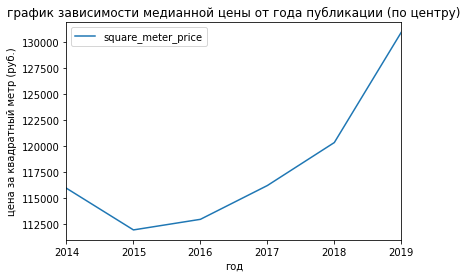

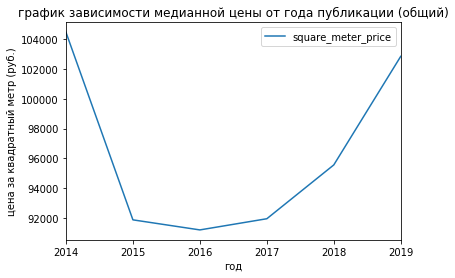

In [72]:
peter_center_data.pivot_table(index='year', values='square_meter_price', aggfunc='median').plot()
plt.title('график зависимости медианной цены от года публикации (по центру)')
plt.xlabel('год')
plt.ylabel('цена за квадратный метр (руб.)')
plt.show()

good_data.pivot_table(index='year', values='square_meter_price', aggfunc='median').plot()
plt.title('график зависимости медианной цены от года публикации (общий)')
plt.xlabel('год')
plt.ylabel('цена за квадратный метр (руб.)')
plt.show()

Довольно интересный результат. Судя по графикам, кризис рынка недвижимости 2015-2019 годов не сильно коснулся Санкт-Петербурга. И даже больше - после выхода, цены в 2019 выросли на 13% по сравнению с 2014 годом.

### Вывод:

Сравнивая с общими данными, в среднем квартиры в центре Санкт-Петербурга больше и стоят они дороже. Внутри центра средняя цена за квадратный метр неизменна. А кризис рынка не очень сильно снижает цены, видимо в центре Петербурга актуально жить всегда.

Одинаковыми как для центра, так и для всего города и пригородов остались два параметра: проблемы первого/последнего этажей и помесячная сезонность цен.

<a id="end"></a>
### Шаг 5. Общий вывод

Входные данные состояли из объявлений о продаже квартир по 22 метрикам на сайте, взятые из сервиса Яндекс.Недвижимость.

Во время предобработки были выявлены следующие *проблемы*: 
- данные в файле были разделены несоответствующим образом
- отстутсвующие значения
- разные строковые значения одного смысла
- несоответствие даных ожидаемому типу
- некоторые данные невозможно правильно прочитать без дополнительной документации
- некоторые данные принимали значения, которые невозможны в реальном мире
- некоторые числовые данные соответствовали вещественному типу данных

Каждая из проблем была обработана соответствующими методами и исправлена по принципу улучшения качества последеющего анализа.
К существующей таблице были добавлены несколько столбцов, которые как повышали читаемость и информативность таблицы, так и помогли при дальнейших исследованиях.

**Резултаты анализа установили наиболее значимые парметры, влияющие на цену квартиры:**
- *Этаж квартиры*. Первый и последний этажи негативно влияют на итоговую стоимость.
- *Количество комнат* - неочевидный факт: чем больше комнат, тем дешевле цена за квадратный метр
- При оценке *общей площади* и *удаленности от центра* стоит категаризовать параметры и выбрать минимальное и максимальное значения цен для каждой категории.
- *Май* и *июнь* - месяцы спада средней стоимости жилья.
- *Рынок недвижимости динамичен* и при оценке стоит опираться на среднюю стоимость недвижимости с похожими параметрами. 
- *Нужно различать центр города от окраин и пригородов*. В центре стоимость жилья всегда больше, и она более устойчива к кризисам рынка. Результаты исследования определили, что радиус центра города Санкт-Петербург приблизительно равен *7 километрам*.

Сервису Яндекс.Недвижимость *рекомендуется* использовать резульаты анализа для построения автоматизированной системы определения рыночной стоимости объектов недвижимости.

Сервису Яндекс.Недвижимость *рекомендуется* внедрить как можно больше обязательных категоральных значений, чтобы в будущем избегать пропусков в данных.